In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_02_21 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [3]:
def savefig(base):
    import matplotlib.pyplot as plt
    for fname in [f'Manuscript/resources/{base}.png',f'Manuscript/resources/{base}.svg']:
        print(fname)
        plt.savefig(fname, bbox_inches='tight')

In [4]:
base='sims/2023-02-21'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

In [5]:
rf_size=19
eta=2e-6
blur=6
number_of_neurons=20
number_of_processes=4
mu_c_mat=[0,7.5]
sigma_c_mat=[0,2]

## Deficit

In [6]:
from collections import namedtuple
params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0
eta_count=0
noise_count=0
open_eye_noise=0.1

for mu_count,mu_c in enumerate(mu_c_mat):
    for sigma_count,sigma_c in enumerate(sigma_c_mat):
        all_params.append(params(count=count,
                         eta=eta,
                         noise=open_eye_noise,
                         blur=blur,
                         number_of_neurons=number_of_neurons,
         sfname=f'{base}/deficit {number_of_neurons} neurons {mu_c} mu_c {sigma_c} sigma_c.asdf',
                                mu_c=mu_c,sigma_c=sigma_c))

        count+=1
for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)



params(count=0, eta=2e-06, noise=0.1, blur=6, number_of_neurons=20, sfname='sims/2023-02-21/deficit 20 neurons 0 mu_c 0 sigma_c.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=2e-06, noise=0.1, blur=6, number_of_neurons=20, sfname='sims/2023-02-21/deficit 20 neurons 0 mu_c 2 sigma_c.asdf', mu_c=0, sigma_c=2)
params(count=2, eta=2e-06, noise=0.1, blur=6, number_of_neurons=20, sfname='sims/2023-02-21/deficit 20 neurons 7.5 mu_c 0 sigma_c.asdf', mu_c=7.5, sigma_c=0)
params(count=3, eta=2e-06, noise=0.1, blur=6, number_of_neurons=20, sfname='sims/2023-02-21/deficit 20 neurons 7.5 mu_c 2 sigma_c.asdf', mu_c=7.5, sigma_c=2)
[....]
params(count=0, eta=2e-06, noise=0.1, blur=6, number_of_neurons=20, sfname='sims/2023-02-21/deficit 20 neurons 0 mu_c 0 sigma_c.asdf', mu_c=0, sigma_c=0)
params(count=1, eta=2e-06, noise=0.1, blur=6, number_of_neurons=20, sfname='sims/2023-02-21/deficit 20 neurons 0 mu_c 2 sigma_c.asdf', mu_c=0, sigma_c=2)
params(count=2, eta=2e-06, noise=0.1, blur=6, number_of_neuro

In [9]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
params=all_params[0]
print(params)
sfname=params.sfname
R=RR[sfname]

params(count=0, eta=2e-06, noise=0.1, blur=6, number_of_neurons=20, sfname='sims/2023-02-21/deficit 20 neurons 0 mu_c 0 sigma_c.asdf', mu_c=0, sigma_c=0)


In [13]:
weak_i=0
strong_i=1

sims/2023-02-21/continuous patch 20 neurons noise 1.0.asdf


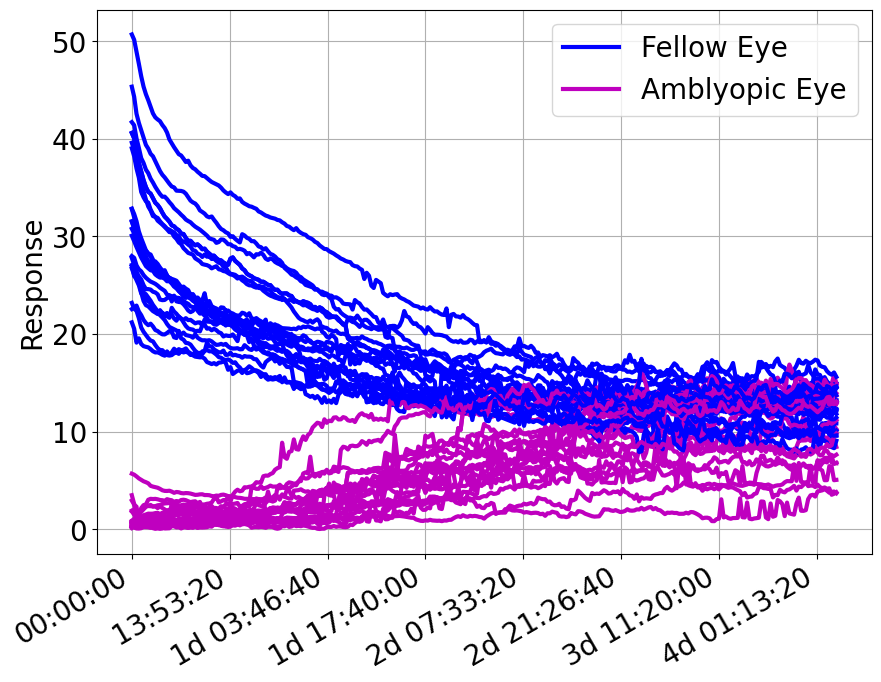

In [41]:
plot(R.t,R.y[:,0,strong_i],'b',label='Fellow Eye')
plot(R.t,R.y[:,0,weak_i],'m',label='Amblyopic Eye')

for n in range(20):
    plot(R.t,R.y[:,n,0],'m')
    plot(R.t,R.y[:,n,1],'b')
    
    
ylabel('Response')
legend()
print(sfname)
reformat_time_axis()    

## Optical Fix

In [18]:
noise_mat=linspace(0,1,11)

all_params=[]
for n,noise in enumerate(noise_mat):
    sfname=base+f'/continuous fix {number_of_neurons} neurons noise {noise:.1f}.asdf'
    
    p=Struct()
    p.eta=eta
    p.number_of_neurons=number_of_neurons
    p.sfname=sfname
    
    p.noise=noise
    p.mu_c=7.5
    p.sigma_c=2
    
    all_params+=[p]

all_params=to_named_tuple(all_params)  

In [19]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/11 [00:00<?, ?it/s]

sims/2023-02-21/continuous fix 20 neurons noise 1.0.asdf


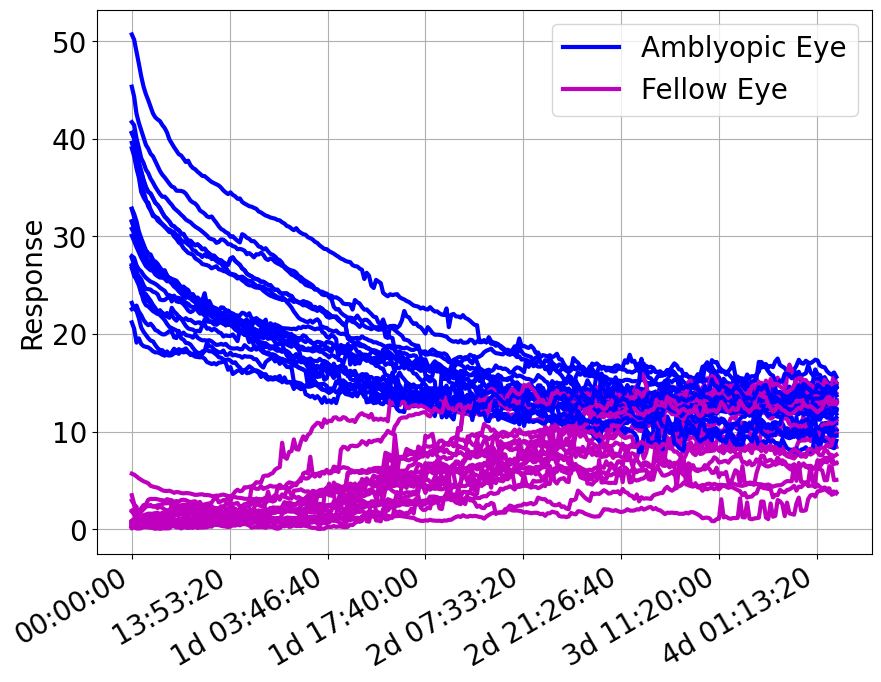

In [25]:
plot(R.t,R.y[:,0,strong_i],'b',label='Fellow Eye')
plot(R.t,R.y[:,0,weak_i],'m',label='Amblyopic Eye')

for n in range(20):
    plot(R.t,R.y[:,n,0],'m')
    plot(R.t,R.y[:,n,1],'b')
    
    
ylabel('Response')
legend()
print(sfname)
reformat_time_axis()    

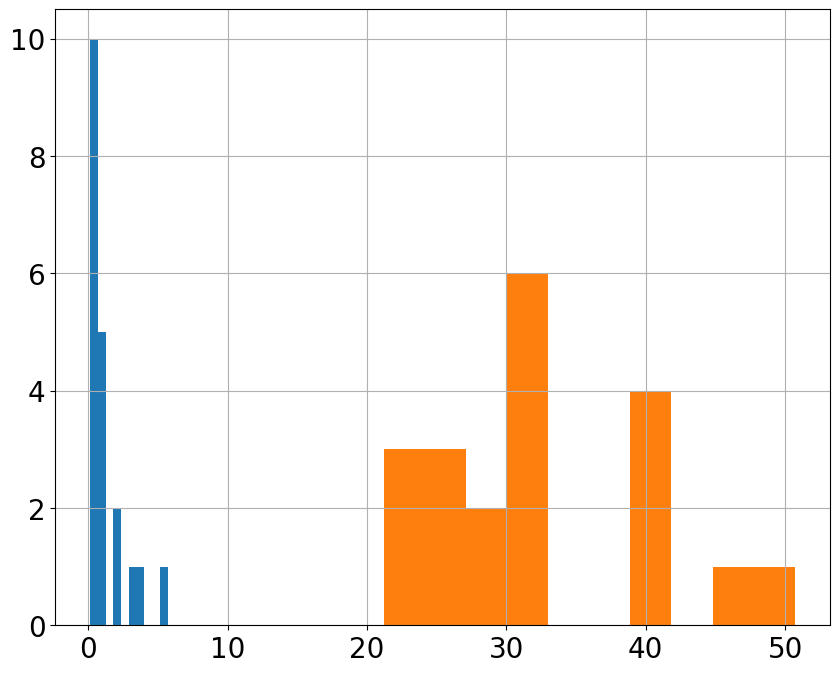

In [31]:
y0=R.y[0,:,0]
y1=R.y[0,:,1]
hist(y0);
hist(y1);

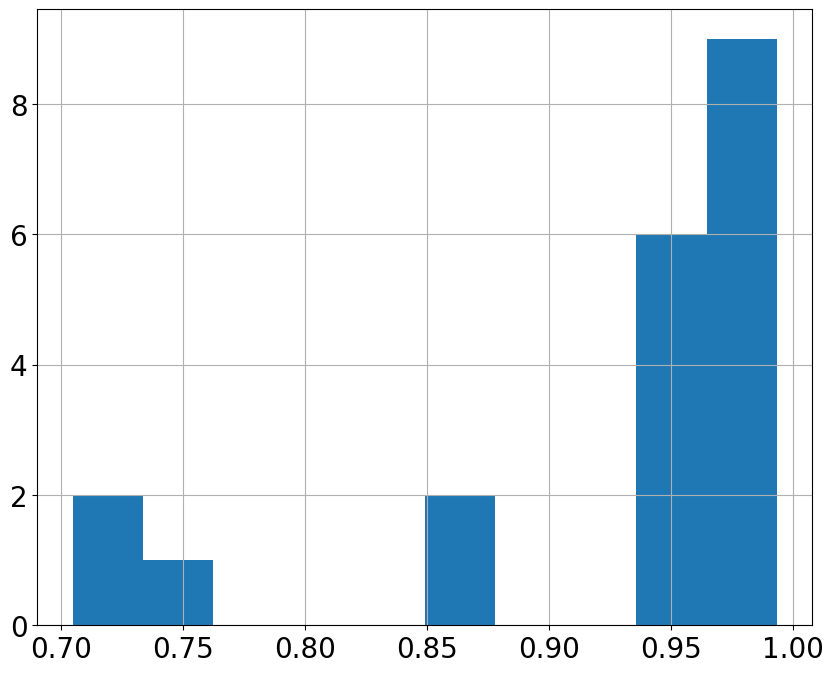

In [34]:
hist((y1-y0)/(y1+y0));

In [ ]:
(self.y[:,:,1]-self.y[:,:,0])/(self.y[:,:,1]+self.y[:,:,0])

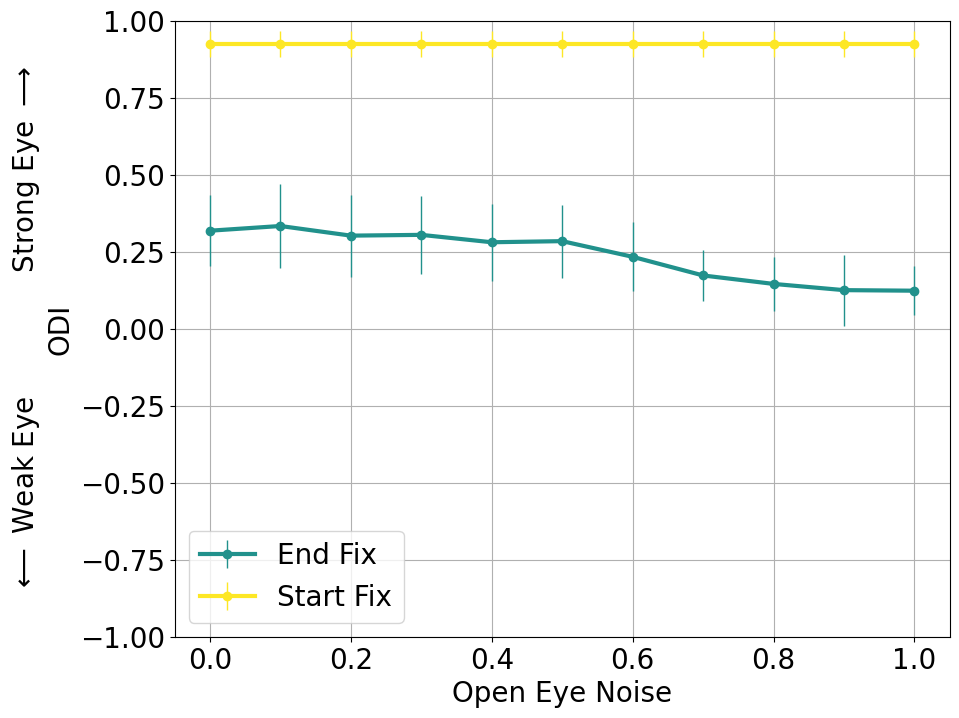

In [36]:
import cycler
colormap=cm.viridis

n = 5

colormap=cm.viridis
color = colormap(np.linspace(0, 1,n))


count=0
s=Storage()
for noise_count,open_eye_noise in enumerate(noise_mat):
    params=all_params[count]
    count+=1

    R=RR[params.sfname]

    noise=params.noise
    μ,σ=μσ(R.ODI[-1])
    μ0,σ0=μσ(R.ODI[0])

    s+=noise,μ,σ,μ0,σ0


noise,μ,σ,μ0,σ0=s.arrays()
errorbar(noise,μ,yerr=2*σ,marker='o',elinewidth=1,color=color[2],
        label=f'End Fix')    
errorbar(noise,μ0,yerr=2*σ0,marker='o',elinewidth=1,color=color[4],
        label=f'Start Fix')    


xlabel('Open Eye Noise')
ylabel(r'$\longleftarrow$ Weak Eye              Strong Eye $\longrightarrow$'+"\nODI")
ylim([-1,1])
legend()


Text(0.5, 0, 'Open-Eye Noise Level')

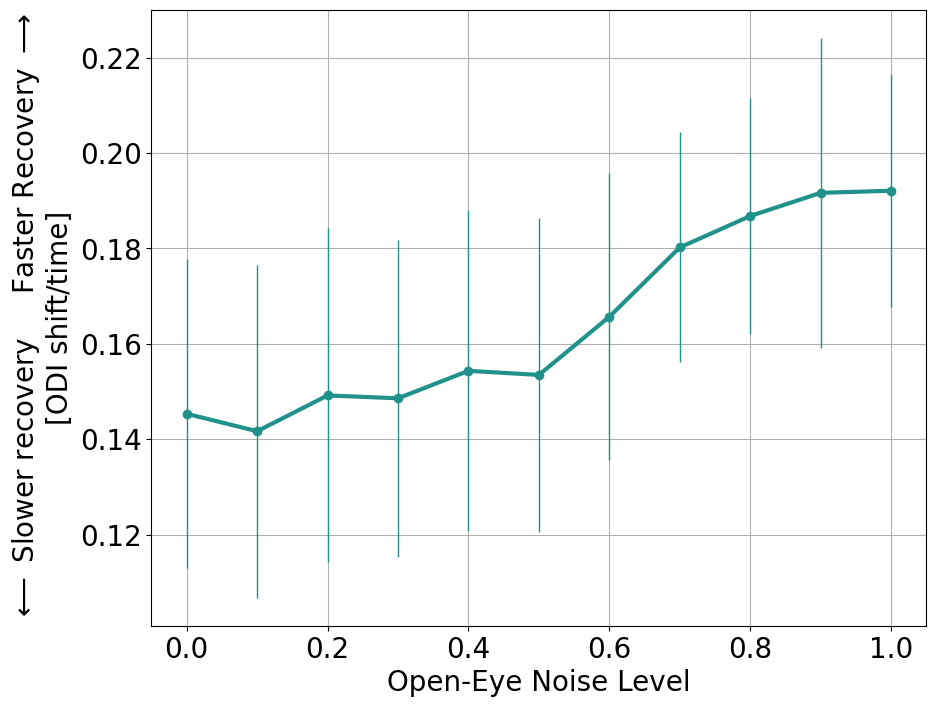

In [37]:
import cycler
colormap=cm.viridis

n = 5

colormap=cm.viridis
color = colormap(np.linspace(0, 1,n))


count=0
s=Storage()
for noise_count,open_eye_noise in enumerate(noise_mat):
    params=all_params[count]
    count+=1

    R=RR[params.sfname]

    noise=params.noise
    
    idx1,idx2=R.sequence_index[0]
    t=R.t/day
    recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  

    s+=noise,recovery_rate_μ,recovery_rate_σ
    
    
noise,recovery_rate_μ,recovery_rate_σ=s.arrays()    

errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,marker='o',elinewidth=1,color=color[2],
        label=f'mu_c={mu_c}, sigma_c={sigma_c}')    


ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
xlabel('Open-Eye Noise Level')


## Patch

In [38]:
closed_eye_noise_mat=linspace(0,1,21)

all_params=[]
for n,noise in enumerate(closed_eye_noise_mat):
    sfname=base+f'/continuous patch {number_of_neurons} neurons noise {noise:.1f}.asdf'
    
    p=Struct()
    p.eta=eta
    p.number_of_neurons=number_of_neurons
    p.sfname=sfname
    
    p.noise=noise
    p.mu_c=7.5
    p.sigma_c=2
    
    all_params+=[p]

all_params=to_named_tuple(all_params)  

In [39]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/21 [00:00<?, ?it/s]

sims/2023-02-21/continuous patch 20 neurons noise 1.0.asdf


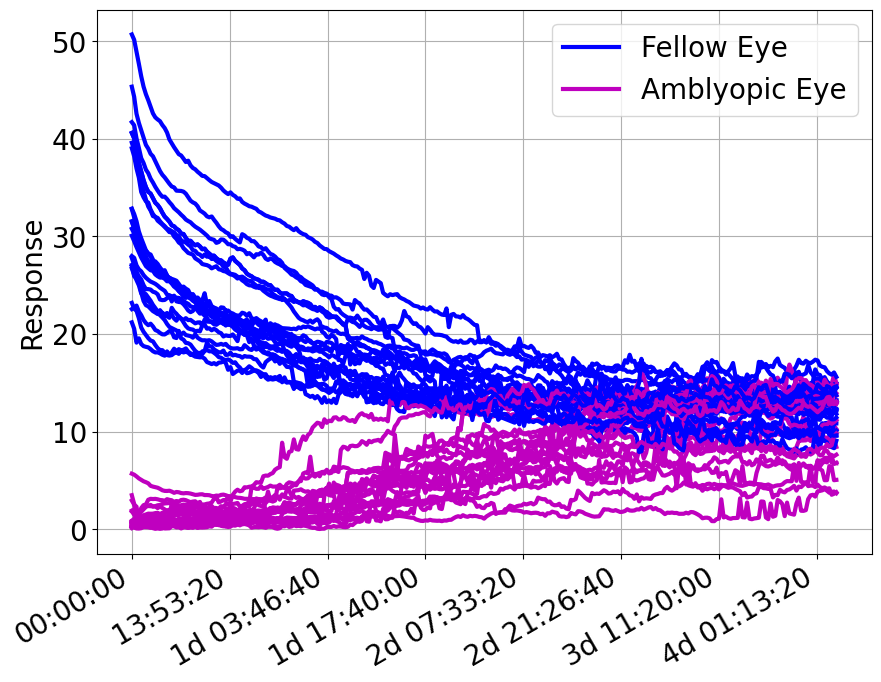

In [42]:
plot(R.t,R.y[:,0,strong_i],'b',label='Fellow Eye')
plot(R.t,R.y[:,0,weak_i],'m',label='Amblyopic Eye')

for n in range(20):
    plot(R.t,R.y[:,n,0],'m')
    plot(R.t,R.y[:,n,1],'b')
    
    
ylabel('Response')
legend()
print(sfname)
reformat_time_axis()    

Text(0.5, 0, 'Open-Eye Noise Level')

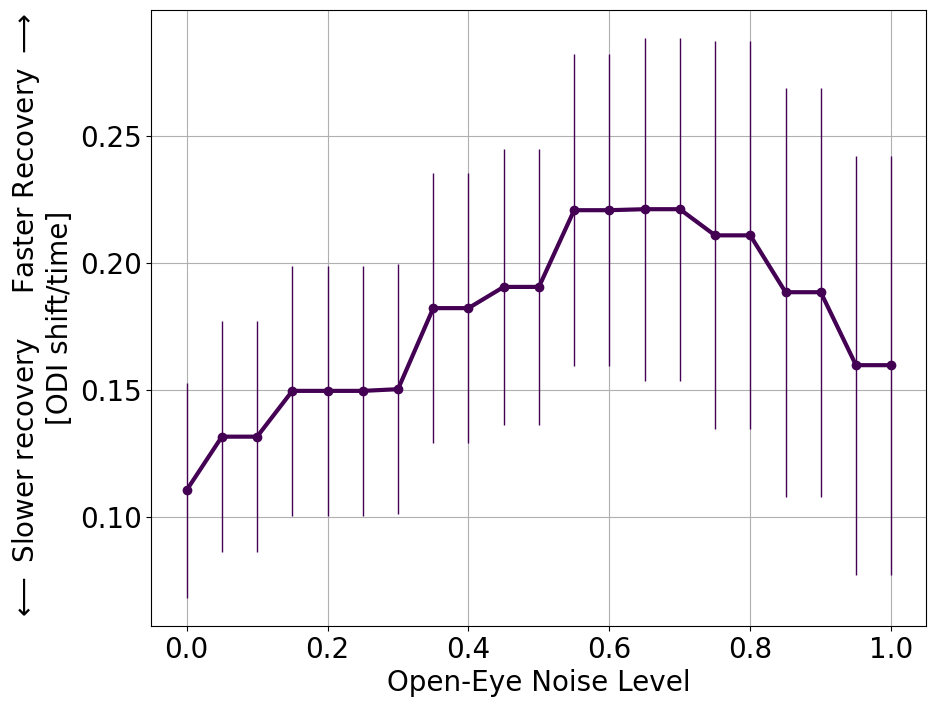

In [43]:
import cycler
colormap=cm.viridis

n = 5

colormap=cm.viridis
color = colormap(np.linspace(0, 1,n))


count=0
s=Storage()
for n,noise in enumerate(closed_eye_noise_mat):
    sfname=base+f'/continuous patch {number_of_neurons} neurons noise {noise:.1f}.asdf'
    params=all_params[count]
    count+=1

    R=RR[params.sfname]

    noise=params.noise
    
    idx1,idx2=R.sequence_index[0]
    t=R.t/day
    recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  

    s+=noise,recovery_rate_μ,recovery_rate_σ
    
    
noise,recovery_rate_μ,recovery_rate_σ=s.arrays()    

errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,marker='o',elinewidth=1,color=color[0],
        label=f'mu_c={mu_c}, sigma_c={sigma_c}')    


ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
xlabel('Open-Eye Noise Level')


## Atropine

In [44]:
atropine_blur_mat=linspace(0,6,21)
closed_eye_noise_mat=linspace(0,1,11)

all_params=[]
for b,blur in enumerate(atropine_blur_mat):
    for n,noise in enumerate(closed_eye_noise_mat):
        sfname=base+f'/continuous atropine {number_of_neurons} neurons noise {noise:.1f} blur {blur:0.1f}.asdf'

        p=Struct()
        p.eta=eta
        p.number_of_neurons=number_of_neurons
        p.sfname=sfname

        p.noise=noise
        p.blur=blur
        p.mu_c=7.5
        p.sigma_c=2

        all_params+=[p]

all_params=to_named_tuple(all_params)  

In [45]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/231 [00:00<?, ?it/s]

In [51]:
atropine_blur_mat=linspace(0,6,21)
closed_eye_noise_mat=linspace(0,1,11)

S=Storage()

count=0
    
for n,noise in tqdm(enumerate(closed_eye_noise_mat)):
    for b,blur in enumerate(atropine_blur_mat):
        sfname=base+f'/continuous atropine {number_of_neurons} neurons noise {noise:.1f} blur {blur:0.1f}.asdf'
        R=RR[params.sfname]


        idx1,idx2=R.sequence_index[0]
        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  

        S+=noise,blur,recovery_rate_μ,recovery_rate_σ    

        count+=1

    
noise,blur,recovery_rate_μ,recovery_rate_σ=S.arrays()        


noise_N=len(closed_eye_noise_mat)
blur_N=len(atropine_blur_mat)

noise=noise.reshape(noise_N,blur_N)
noise,blur,recovery_rate_μ,recovery_rate_σ=[_.reshape(noise_N,blur_N) for _ in (noise,blur,recovery_rate_μ,recovery_rate_σ)]


0it [00:00, ?it/s]

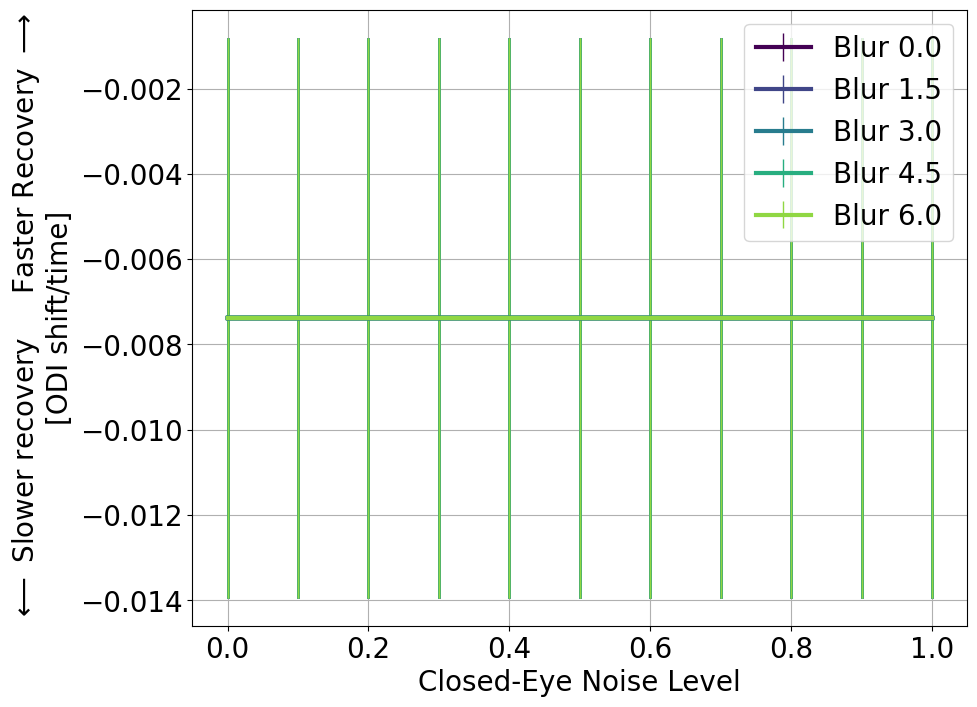

In [53]:
import cycler
colormap=cm.viridis
n = 25
#color = colormap(np.linspace(1, 0,int(1.2*n)))
color = colormap(np.linspace(0, 1,n))
#mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)



blur_N=blur.shape[1]
for b in range(blur_N):
    
    if blur[0,b] in [0,1.5,3,4.5,6]:
        errorbar(noise[:,b],-recovery_rate_μ[:,b],yerr=2*recovery_rate_σ[:,b],elinewidth=1,
                 label=f'Blur {blur[0,b]}',color=color[b]) # positive = recovery
    else:
        errorbar(noise[:,b],-recovery_rate_μ[:,b],yerr=2*recovery_rate_σ[:,b],elinewidth=1,
                 color=color[b]) # positive = recovery
        
        
# noise,recovery_rate_μ,recovery_rate_σ=patch_result        
# errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,color='k',label='Patch') # positive = recovery
        
        
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
xlabel('Closed-Eye Noise Level')
#title('Atropine Treatment')
    
legend()

## Contrast with mask and contrast only

In [54]:
contrast_mat=linspace(0,1,11)
mask_mat=array([0,1])
f_mat=array([10,30,50,70,90])


all_params=[]
for c,contrast in enumerate(contrast_mat):
    sfname=base+f'/continuous contrast {number_of_neurons} neurons contrast {contrast:.1f}.asdf'

    p=Struct()
    p.eta=eta
    p.number_of_neurons=number_of_neurons
    p.sfname=sfname

    p.contrast=contrast
    p.mask=0
    p.f=10. # not used when mask=0
    p.mu_c=7.5
    p.sigma_c=2

    all_params+=[p]

all_params=to_named_tuple(all_params) 

In [55]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/11 [00:00<?, ?it/s]

In [56]:
number_of_neurons=20
S=Storage()

for c,contrast in tqdm(enumerate(contrast_mat)):
    sfname=base+f'/continuous contrast {number_of_neurons} neurons contrast {contrast:.1f}.asdf'
    R=RR[params.sfname]


    idx1,idx2=R.sequence_index[0]

    t=R.t/day
    recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  
    
    S+=contrast,recovery_rate_μ,recovery_rate_σ    
    
    
contrast,recovery_rate_μ,recovery_rate_σ=S.arrays()

contrast_result=contrast,recovery_rate_μ,recovery_rate_σ

0it [00:00, ?it/s]

In [57]:
contrast_mat=linspace(0,1,11)
mask_mat=array([0,1])
f_mat=array([10,30,50,70,90])


all_params=[]
for c,contrast in enumerate(contrast_mat):
    for fi,f in enumerate(f_mat):
        sfname=base+f'/continuous contrast {number_of_neurons} neurons contrast {contrast:.1f} mask f {f}.asdf'

        p=Struct()
        p.eta=eta
        p.number_of_neurons=number_of_neurons
        p.sfname=sfname

        p.contrast=contrast
        p.mask=1
        p.f=f # not used when mask=0
        p.mu_c=7.5
        p.sigma_c=2

        all_params+=[p]

all_params=to_named_tuple(all_params)  

In [58]:
RR={}
for params in tqdm(all_params):
    RR[params.sfname]=Results(params.sfname)

  0%|          | 0/55 [00:00<?, ?it/s]

In [59]:
number_of_neurons=20
S=Storage()

for c,contrast in enumerate(contrast_mat):
    for fi,f in enumerate(f_mat):
        sfname=base+f'/continuous contrast {number_of_neurons} neurons contrast {contrast:.1f} mask f {f}.asdf'

        R=RR[params.sfname]


        idx1,idx2=R.sequence_index[0]

        t=R.t/day
        recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  

        S+=f,contrast,recovery_rate_μ,recovery_rate_σ 
    
    
f,contrast,recovery_rate_μ,recovery_rate_σ=S.arrays()

f_N=len(f_mat)
contrast_N=len(contrast_mat)


f,contrast,recovery_rate_μ,recovery_rate_σ=[_.reshape(f_N,contrast_N) for _ in (f,contrast,recovery_rate_μ,recovery_rate_σ)]
mask_result=f,contrast,recovery_rate_μ,recovery_rate_σ

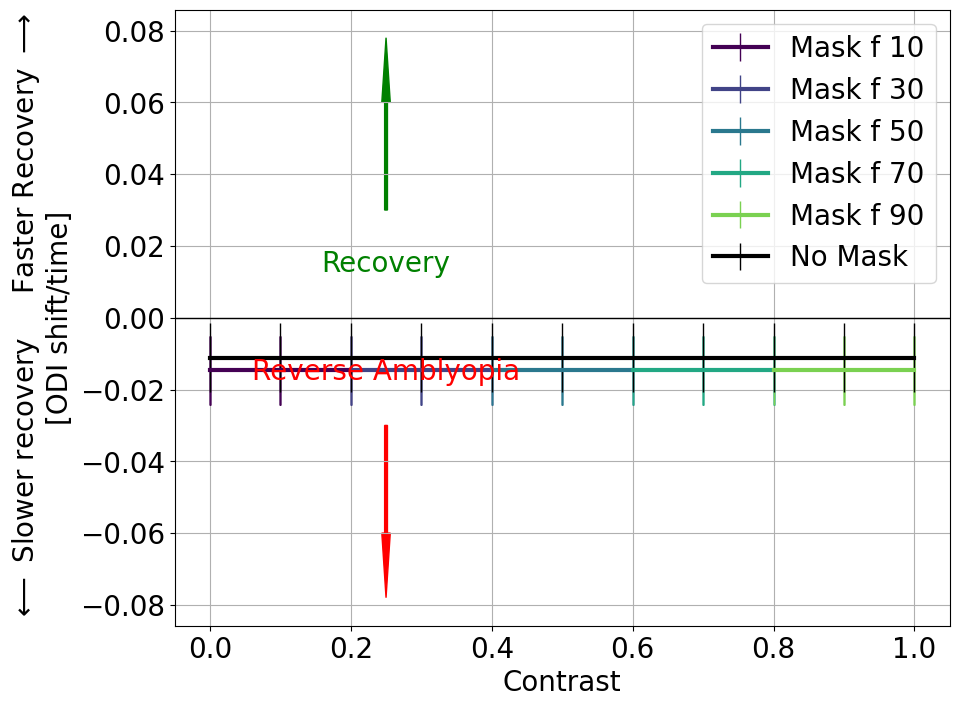

In [60]:
import cycler
f_mat=array([10,30,50,70,90])
f_N=len(f_mat)


n = len(f_mat)+1
#colormap=cm.Blues
#color = colormap(np.linspace(1, 0,int(1.2*n)))
colormap=cm.viridis
color = colormap(np.linspace(0, 1,int(n)))
#mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

f,contrast,recovery_rate_μ,recovery_rate_σ=mask_result
for fi in range(f_N):
    
    errorbar(contrast[fi,:],-recovery_rate_μ[fi,:],yerr=2*recovery_rate_σ[fi,:],elinewidth=1,
             label=f'Mask f {f[fi,0]}',color=color[fi]) # positive = recovery

    
    
contrast,recovery_rate_μ,recovery_rate_σ=contrast_result
errorbar(contrast,-recovery_rate_μ,yerr=2*recovery_rate_σ,elinewidth=1,color='k',label='No Mask') # positive = recovery

    
ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")

xlabel('Contrast')
#title('Contrast+Mask Treatment')
    
xl=gca().get_xlim()
plot(xl,[0,0],'k-',lw=1)
gca().set_xlim(xl)
    
text(0.25,0.015,'Recovery',ha='center',va='center',color='green')
text(0.25,-0.015,'Reverse Amblyopia',ha='center',va='center',color='red')
arrow(.25,-.03,0,-.03,width=0.004,color='red')
arrow(.25,.03,0,.03,width=0.004,color='green')
legend()
